In [1]:
import csv 
import numpy as np
import pandas as pd

dr_data = pd.read_csv('dr_contents.csv', sep = ',')


In [2]:
dr_data

,Publish date,Text,Title,URL
0,2013-06-06 21:14:35+00:00,"Den mexicanske hær har befriet 165 migranter, ...",Mexicansk hær befrier 165 migranter,http://dr.dk/nyheder/udland/mexicansk-haer-bef...
1,2013-04-11 20:30:00+00:00,Italienske kystvagter udrettede torsdag noget ...,Italien: Kystvagter redder 500 afrikanske migr...,http://dr.dk/nyheder/udland/italien-kystvagter...
2,2011-06-12 21:46:00+00:00,De mexicanske myndigheder har afsløret en trai...,213 migranter gemt i trailer,http://dr.dk/nyheder/udland/213-migranter-gemt...
3,2013-08-26 03:53:00+00:00,"Mindst seks mennesker er dræbt, og adskillige ...",Dødstal stiger efter godstogulykke i Mexico,http://dr.dk/nyheder/udland/doedstal-stiger-ef...
4,2012-10-08 13:03:00+00:00,Politiet i Københavns Lufthavn lader mange ill...,Blad: Politi lader illegale passere,http://dr.dk/nyheder/indland/blad-politi-lader...
5,2013-10-04 05:05:00+00:00,Det store antal døde afrikanske asylsøgere ud ...,Bådkatastrofe sætter spot på flygtningeproblem,http://dr.dk/nyheder/udland/baadkatastrofe-sae...
6,2010-08-30 11:28:00+00:00,Over 3000 var samlede ved Tornado-festivalen i...,14-årig pige dræbt ved nynazistisk angreb,http://dr.dk/nyheder/udland/14-aarig-pige-drae...
7,2012-01-31 22:35:00+00:00,Håbet om en bedre fremtid fik en dødelig udgan...,1500 døde på vej til Europa sidste år,http://dr.dk/nyheder/udland/1500-doede-paa-vej...
8,2012-10-08 14:43:00+00:00,Det skal være slut med at illegale migranter k...,DF: Illegale i lufthavnen skal stoppes,http://dr.dk/nyheder/politik/df-illegale-i-luf...
9,2013-09-10 16:01:00+00:00,Når syrere i stor stil flygter ud af deres kri...,Her er prisen for et nyt liv i Europa,http://dr.dk/nyheder/udland/her-er-prisen-et-n...


## Lemmatization

In [3]:
# Import relevant packages
import lemmy
lemmatizer = lemmy.load("da")
from nltk import word_tokenize
from unicodedata import normalize, name

In [4]:
snap_of_data = dr_data[4:9]
snap_of_data

,Publish date,Text,Title,URL
4,2012-10-08 13:03:00+00:00,Politiet i Københavns Lufthavn lader mange ill...,Blad: Politi lader illegale passere,http://dr.dk/nyheder/indland/blad-politi-lader...
5,2013-10-04 05:05:00+00:00,Det store antal døde afrikanske asylsøgere ud ...,Bådkatastrofe sætter spot på flygtningeproblem,http://dr.dk/nyheder/udland/baadkatastrofe-sae...
6,2010-08-30 11:28:00+00:00,Over 3000 var samlede ved Tornado-festivalen i...,14-årig pige dræbt ved nynazistisk angreb,http://dr.dk/nyheder/udland/14-aarig-pige-drae...
7,2012-01-31 22:35:00+00:00,Håbet om en bedre fremtid fik en dødelig udgan...,1500 døde på vej til Europa sidste år,http://dr.dk/nyheder/udland/1500-doede-paa-vej...
8,2012-10-08 14:43:00+00:00,Det skal være slut med at illegale migranter k...,DF: Illegale i lufthavnen skal stoppes,http://dr.dk/nyheder/politik/df-illegale-i-luf...


In [5]:
punctuations = "?:!.,;)(-"

def lemmaSentence(body_text):
    lemma_list = []
    
    for sentence in body_text:
        lemma_sen = word_tokenize(str(sentence))
    
        for word in lemma_sen:
            word = normalize('NFKC', word)
            if word in punctuations:
                lemma_sen.remove(word)
        
        lemmaet_list = [lemmatizer.lemmatize('', normalize('NFKC', word)) for word in lemma_sen]
        
        lemma_min_word = [min(lst, key=len) for lst in lemmaet_list]
        lemma_list.append(" ".join(lemma_min_word))
        
    return lemma_list


In [6]:
%time
snap_of_data['Text'] = lemmaSentence(snap_of_data['Text'])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
snap_of_data

,Publish date,Text,Title,URL
4,2012-10-08 13:03:00+00:00,Politi i København Lufthavn lade mange illegal...,Blad: Politi lader illegale passere,http://dr.dk/nyheder/indland/blad-politi-lader...
5,2013-10-04 05:05:00+00:00,Det stor antal dø afrikansk asylsøger ud for d...,Bådkatastrofe sætter spot på flygtningeproblem,http://dr.dk/nyheder/udland/baadkatastrofe-sae...
6,2010-08-30 11:28:00+00:00,Ovvære 3000 var samle ved Tornado-festival i b...,14-årig pige dræbt ved nynazistisk angreb,http://dr.dk/nyheder/udland/14-aarig-pige-drae...
7,2012-01-31 22:35:00+00:00,Håb om en god fremtid få en dødelig udgang for...,1500 døde på vej til Europa sidste år,http://dr.dk/nyheder/udland/1500-doede-paa-vej...
8,2012-10-08 14:43:00+00:00,Det skal være slut med at illegal migrant kunn...,DF: Illegale i lufthavnen skal stoppes,http://dr.dk/nyheder/politik/df-illegale-i-luf...


In [8]:
snap_of_data['Title'] = lemmaSentence(snap_of_data['Title'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
dr_data_alt = pd.read_csv('dr_contents.csv', sep = ',')

In [12]:
%time
dr_data_alt['Text'] = lemmaSentence(dr_data_alt['Text'])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [196]:
dr_data_alt.head()

,Publish date,Text,Title,URL
0,2013-06-06 21:14:35+00:00,"Den mexicanske hær har befriet 165 migranter, ...",Mexicansk hær befrier 165 migranter,http://dr.dk/nyheder/udland/mexicansk-haer-bef...
1,2013-04-11 20:30:00+00:00,Italienske kystvagter udrettede torsdag noget ...,Italien: Kystvagter redder 500 afrikanske migr...,http://dr.dk/nyheder/udland/italien-kystvagter...
2,2011-06-12 21:46:00+00:00,De mexicanske myndigheder har afsløret en trai...,213 migranter gemt i trailer,http://dr.dk/nyheder/udland/213-migranter-gemt...
3,2013-08-26 03:53:00+00:00,"Mindst seks mennesker er dræbt, og adskillige ...",Dødstal stiger efter godstogulykke i Mexico,http://dr.dk/nyheder/udland/doedstal-stiger-ef...
4,2012-10-08 13:03:00+00:00,Politiet i Københavns Lufthavn lader mange ill...,Blad: Politi lader illegale passere,http://dr.dk/nyheder/indland/blad-politi-lader...


## Remove articles with less than three mentions of "flygtning" or "asyl ansøger"

In [197]:
dr_data_alt['Word count'] = dr_data_alt['Text'].str.lower().str.split()

In [198]:
dr_data_alt['Text'] = dr_data_alt['Text'].astype('str')

In [200]:
dr_data_alt['count'] = dr_data_alt['Text'].str.count('flygtning') + dr_data_alt['Text'].str.count('indvandre') + dr_data_alt['Text'].str.count('asylansøg') + dr_data_alt['Text'].str.count('migrant') + dr_data_alt['Text'].str.count('immigrant') 


In [194]:
dr_data_alt[dr_data_alt['count']>2]

,Publish date,Text,Title,URL,Date quarterly,Word count,series,count,count2
0,2013-06-06 21:14:35,Den mexicansk hær har befri 165 migrant der ha...,Mexicansk hær befrier 165 migranter,http://dr.dk/nyheder/udland/mexicansk-haer-bef...,2013Q2,"[den, mexicansk, hær, har, befri, 165, migrant...",Den mexicansk hær har befri 165 migrant der ha...,3,<map object at 0x1a2be22a58>
1,2013-04-11 20:30:00,Italiensk kystvagt udrette torsdag nogen af en...,Italien: Kystvagter redder 500 afrikanske migr...,http://dr.dk/nyheder/udland/italien-kystvagter...,2013Q2,"[italiensk, kystvagt, udrette, torsdag, nogen,...",Italiensk kystvagt udrette torsdag nogen af en...,6,<map object at 0x1a2be22a58>
4,2012-10-08 13:03:00,Politi i København Lufthavn lade mange illegal...,Blad: Politi lader illegale passere,http://dr.dk/nyheder/indland/blad-politi-lader...,2012Q4,"[politi, i, københavn, lufthavn, lade, mange, ...",Politi i København Lufthavn lade mange illegal...,3,<map object at 0x1a2be22a58>
5,2013-10-04 05:05:00,Det stor antal dø afrikansk asylsøger ud for d...,Bådkatastrofe sætter spot på flygtningeproblem,http://dr.dk/nyheder/udland/baadkatastrofe-sae...,2013Q4,"[det, stor, antal, dø, afrikansk, asylsøger, u...",Det stor antal dø afrikansk asylsøger ud for d...,8,<map object at 0x1a2be22a58>
7,2012-01-31 22:35:00,Håb om en god fremtid få en dødelig udgang for...,1500 døde på vej til Europa sidste år,http://dr.dk/nyheder/udland/1500-doede-paa-vej...,2012Q1,"[håb, om, en, god, fremtid, få, en, dødelig, u...",Håb om en god fremtid få en dødelig udgang for...,6,<map object at 0x1a2be22a58>
11,2013-10-07 09:57:00,I fem time flyde vi bar rund blandt de dø krop...,Overlevende fra Lampedusa: Vi flød rundt bland...,http://dr.dk/nyheder/udland/overlevende-fra-la...,2013Q4,"[i, fem, time, flyde, vi, bar, rund, blandt, d...",I fem time flyde vi bar rund blandt de dø krop...,7,<map object at 0x1a2be22a58>
12,2013-10-12 07:32:00,Malta premierminister Joseph Muscat sige at de...,Malta: Middelhavet er blevet en kirkegård,http://dr.dk/nyheder/udland/malta-middelhavet-...,2013Q4,"[malta, premierminister, joseph, muscat, sige,...",Malta premierminister Joseph Muscat sige at de...,4,<map object at 0x1a2be22a58>
13,2013-10-04 14:59:00,Efte den sen bådkæntning med flygtning ud for ...,VIDEO Korrespondent: EU fokuserer udelukkende ...,http://dr.dk/nyheder/udland/video-korresponden...,2013Q4,"[efte, den, sen, bådkæntning, med, flygtning, ...",Efte den sen bådkæntning med flygtning ud for ...,9,<map object at 0x1a2be22a58>
14,2013-07-24 09:16:00,Dødstal voks efter en fiskerbåd med op mod 200...,Fiskerbåd med 200 flygtninge sunket - Vi gik i...,http://dr.dk/nyheder/udland/fiskerbaad-med-200...,2013Q3,"[dødstal, voks, efter, en, fiskerbåd, med, op,...",Dødstal voks efter en fiskerbåd med op mod 200...,5,<map object at 0x1a2be22a58>
19,2013-10-25 13:13:00,EU statspolitik og regeringschef udtrykke i s...,Lampedusa-problematik: EU-ledere vil se handli...,http://dr.dk/nyheder/politik/lampedusa-problem...,2013Q4,"[eu, statspolitik, og, regeringschef, udtrykke...",EU statspolitik og regeringschef udtrykke i s...,3,<map object at 0x1a2be22a58>


## Bag of Words

In [40]:
sentence_1 = dr_data_alt[:1]['Text']

sentence_1

0    Den mexicansk hær har befri 165 migrant der ha...
Name: Text, dtype: object

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annafalkjensen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
tokens = [str(x) for x in sentence_1][0].split()

Den:3
mexicansk:2
hær:1
befri:2
165:1
migrant:3
holde:3
fange:3
gruppe:3
kriminel:1
nordlig:1
Mexico:2
Det:1
flest:1
offer:1
Centralamerika:1
oplyse:1
myndighed:1
stor:1
inkludere:1
20:1
mindreårig:1
tag:1
forsøge:1
krydse:1
grænse:2
USA:2
På:1
baggrund:1
tip:1
lykkes:1
militærstyrke:1
finde:1
frem:1
overfylde:1
ejendom:1
unde:1
ussel:1
usund:1
forhold:1
Gustavo:1
Diaz:1
Ordaz:1
nær:1
En:1
mand:1
vag:1
anholde:1
eftersøge:1
sige:2
talsmand:2
indenrigsministerie:1
Blandt:1
77:1
El:1
Salvador:1
50:1
Guatemala:1
23:1
Honduras:1
enkel:1
indisk:1
statsborger:1
National:1
Menneskerettighedskommission:1
anslå:1
rapport:1
2011:1
hver:1
år:1
kidnappe:1
omtrent:1
20.000:1
person:1
familiemedlem:1
opkræve:1
løsesum:1
mere:1
2000:1
dollar:1
I:1
2010:1
72:1
fund:1
dræbe:1
gård:1
tilsyneladende:1
eje:1
narkokartel:1
Lvi:1
Zeta:1
/ritzau/AFP:1


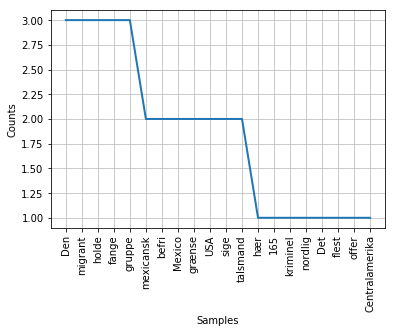

In [43]:
from nltk.corpus import stopwords
sr = stopwords.words('danish')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('danish'):
        
        clean_tokens.remove(token)
    
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

freq.plot(20, cumulative=False)

In [44]:
dr_data_alt.ftypes

Publish date      datetime64[ns]:dense
Text                      object:dense
Title                     object:dense
URL                       object:dense
Date quarterly            object:dense
dtype: object

In [45]:
# convert Publish date column to type 'datetime'
dr_data_alt['Publish date'] =  pd.to_datetime(dr_data_alt['Publish date'], format='%Y-%m-%d %H:%M:%S.%f')

In [59]:
# create quarter column
dr_data_alt['Date quarterly'] = pd.to_datetime(dr_data_alt['Publish date']).dt.to_period('Q')

In [109]:
# group articles together by quarter
artic_quar = dr_data_alt.groupby('Date quarterly')['Text'].apply(lambda x: "{%s}" % ', '.join(x))
artic_quar

Date quarterly
2007Q1    {Dvære ske ikke en utidig indblanding af polit...
2007Q2    {Ny Alliance formand Nas Khade bekræfte at Ven...
2007Q3    {Dansk Folkeparti kæmpe for at bevare sin magt...
2007Q4    {Dansk Flygtningehjælp indsamler formå i dag a...
2008Q1    {Regeringsparti og Dansk Folkeparti være god t...
2008Q2    {Den italiensk Supere Cup-finale mellem mester...
2008Q3    {Da Rohullah Nikpai onsdag vinde bronze i mand...
2008Q4    {I den nordlig del af Argentina hovedstad Buen...
2009Q1    {Op imod 750 menneske være blive dræbe i løb a...
2009Q4    {Flere hundred tusind afrikaner være flygte ti...
2010Q1    {Myndighed i Norge har bestille fly til flere ...
2010Q2    {Kina premierminister Wen Jibao opfordre land ...
2010Q3    {Ovvære 3000 var samle ved Tornado-festival i ...
2010Q4    {Politi ville udvise medmenneskelighed og undl...
2011Q1    {Når man være asylansøger være man afskære fra...
2011Q2    {De mexicansk myndighed har afsløre en trailer...
2011Q3    {Når asylansøge

In [76]:
# remove stop words from articles
sr = stopwords.words('danish')
clean_articles = artic_quar[:]
for word in artic_quar:
    if word in sr:
        
        clean_articles.remove(word)

In [110]:
clean_articles

Date quarterly
2007Q1    {Dvære ske ikke en utidig indblanding af polit...
2007Q2    {Ny Alliance formand Nas Khade bekræfte at Ven...
2007Q3    {Dansk Folkeparti kæmpe for at bevare sin magt...
2007Q4    {Dansk Flygtningehjælp indsamler formå i dag a...
2008Q1    {Regeringsparti og Dansk Folkeparti være god t...
2008Q2    {Den italiensk Supere Cup-finale mellem mester...
2008Q3    {Da Rohullah Nikpai onsdag vinde bronze i mand...
2008Q4    {I den nordlig del af Argentina hovedstad Buen...
2009Q1    {Op imod 750 menneske være blive dræbe i løb a...
2009Q4    {Flere hundred tusind afrikaner være flygte ti...
2010Q1    {Myndighed i Norge har bestille fly til flere ...
2010Q2    {Kina premierminister Wen Jibao opfordre land ...
2010Q3    {Ovvære 3000 var samle ved Tornado-festival i ...
2010Q4    {Politi ville udvise medmenneskelighed og undl...
2011Q1    {Når man være asylansøger være man afskære fra...
2011Q2    {De mexicansk myndighed har afsløre en trailer...
2011Q3    {Når asylansøge